# IPM DSS

## import modules

In [1]:
import pandas
#pandas.set_option('display.max_colwidth', 50)
import numpy as np
from weatherdata.ipm import WeatherDataHub
from openalea.dss import Hub
from openalea.dss.datadir import datadir


## Access to DSS catalog

In [2]:
h = Hub()
h.display()

,dss,models,pests,crops,description
0,com.ipmwise,ipmwiseDK,[WEEDSP],"[TRZAW, TRZAS, HORVS, HORVW, SECCW, TTLWI, AVE...",Dansk: Tilpas ukrudtsbekæmpelsen til netop dit...
1,com.ipmwise,ipmwiseNO,[WEEDSP],"[TRZAW, TRZAS, HORVS, HORVW, AVESA, SECCW]",VIPS-Ugras 2.0 er en ny versjon av VIPS-ugras....
2,com.ipmwise,ipmwiseES,[WEEDSP],"[TRZAW, TRZAS, HORVS, HORVW, TTLWI, SECCW, TRZ...",Adapta tu manejo de malas hierbas a tus necesi...
3,com.ipmwise,ipmwiseDEMO,[WEEDSP],"[TRZAW, ZEAMX]",Adapt weed management to your needs as a profe...
4,uk.WarwickHRI,LAMTEQ,[LAMTEQ],[NARSS],THE PEST: The Large Narcissus Fly (Merodon equ...
...,...,...,...,...,...
56,pl.gov.edwin,eDWIN_LINK,[XPESTS],[XCROPS],"The eDWIN ""Virtual farm"" allows users in Polan..."
57,de.ISIP,siggetreide,[XPESTS],"[TRZAW, HORVW, SECCW, TTLWI, HORVS]",With weather-based forecast models for pests a...
58,slugstatus.farming.co.uk,SlugWatch2023,[WEEDSP],[XCROPS],THE PEST: Widely present in many horticultural...
59,AHDB.OSR_disease_forecasts,SCLESC,[SCLESC],[BRSNN],Sclerotinia stem rot is usually the main disea...


## Get model and run model
To connect to the model, simply enter the dss name and model name

In [3]:
psilartemp=h.get(dss="no.nibio.vips",model="PSILARTEMP")

Once getted to model you can :
* display information of the model in order to identify input data required for the model and the output of the model
* run model according to information

### Display information of the model

In [4]:
psilartemp.informations(display="dataframe")

,name,id,description,type_of_decision,pests,crops,weather input,field_observation input,output,output_description
0,Carrot fly flight model,PSILARTEMP,THE PEST: The first generation of adult carrot...,Short-term tactical,[PSILRO],[DAUCS],1002,None,"TMDD5C, THRESHOLD_1, THRESHOLD_2, THRESHOLD_3","Accumulated day degrees, Threshold for start o..."


**DSS model can be required weather data input or field observation inputs**
In this case model requiered weather information with 1002 parameter (see ipm weather description) to obtain weather you can request IPM weatherservices to  from weatherdata package (see weatherdata demo)

*Note:* weatherdata must be in json format according to IPM weather schema

In [5]:
# get weather data input for the model from the IPM plateform
ws=WeatherDataHub()
ws.list_resources
fmi=ws.get_ressource(name='fi.fmi.observation.station')

weather=fmi.data(stationId=[101533],parameters=[1002],interval=3600,display="json")

INFO:start connecting to station 101533


with weather data you can run model using run function to obtain model output in dataset format with variable metainformation

In [6]:
ds=psilartemp.run(weatherdata=weather)
ds

<xarray.Dataset>
Dimensions:      (time: 21)
Coordinates:
  * time         (time) datetime64[ns] 2020-06-12 2020-06-13 ... 2020-07-02
Data variables:
    TMDD5C       (time) float64 10.65 24.05 38.73 53.66 ... 268.7 277.5 286.2
    THRESHOLD_1  (time) float64 260.0 260.0 260.0 260.0 ... 260.0 260.0 260.0
    THRESHOLD_2  (time) float64 360.0 360.0 360.0 360.0 ... 360.0 360.0 360.0
    THRESHOLD_3  (time) float64 560.0 560.0 560.0 560.0 ... 560.0 560.0 560.0
Attributes:
    name:             Carrot fly flight model
    id:               PSILARTEMP
    version:          1.0
    authors:          {'name': '', 'email': 'vips@nibio.no', 'organization': ...
    description:      THE PEST: The first generation of adult carrot fly emer...
    description_url:  https://www.vips-landbruk.no/forecasts/models/PSILARTEMP/

### Plot data model
Once you have model output, you can plot result using plot function

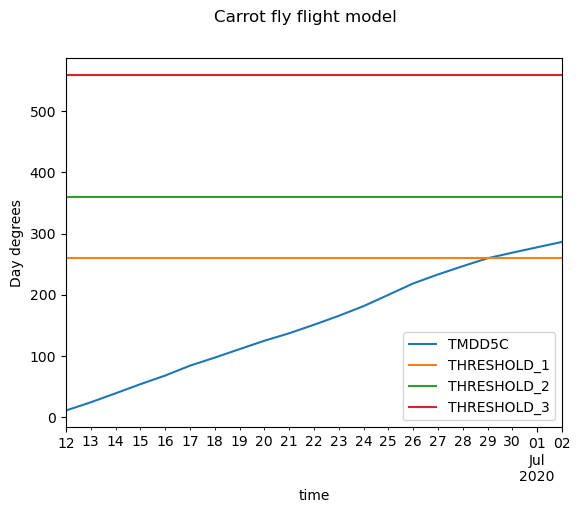

In [7]:
psilartemp.plot(ds)

### example with field observation

In [8]:
psilarobs=h.get(dss="no.nibio.vips",model="PSILAROBSE")
psilarobs.informations(display="")

{'name': 'Carrot rust fly observation model',
 'id': 'PSILAROBSE',
 'version': '1.0',
 'purpose': 'Estimates risk of damage by Carrot Rust Fly',
 'description': 'The warning system model is based on weekly observations of adult carrot rust flies captured on yellow sticky traps. The model is based in its entirety on observations, with no input of weather data or weather forecasts. Traps are placed in the field edge and in the field and are examined for carrot rust flies weekly throughout the season. The number of adult carrot rust flies is registered in VIPS and is used in the warning system model. The observations are compared with the economic threshold levels and a warning is calculated. After organophosphates (which had a good effect against larvae) were removed from the market, they were replaced by pyrethroids that only work against the adult stage. Studies were carried out in 2005 and 2006 to adjust the larval-based thresholds to chemical control of adult flies. The experience fr

In [10]:
# field observation data

data=psilarobs.df_reader_fieldObservation(datadir + 'model_input_fieldobservation.json',longitude=11.025635,
                                latitude=59.715791,
                                timeZone="Europe/paris",sep=";",
                                dayfirst=True,
                                pestEPPOCode="PSILRO",
                                cropEPPOCode="DAUCS")
data
data.attrs

KeyError: 'time'

In [11]:
ds=psilarobs.run(fieldObservation=data)
ds


NameError: name 'data' is not defined

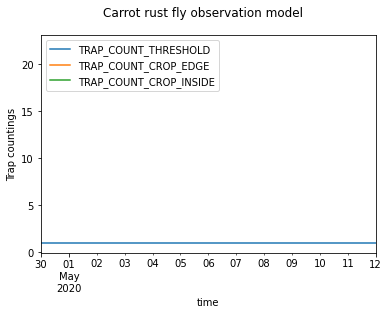

In [12]:
psilarobs.plot(ds)

## Other example of model

In [12]:
deliaradic=h.get(dss="no.nibio.vips",model="DELIARADIC") # get one model using dss and model
deliaradic.informations(display="dataframe") #display information about model

,name,id,description,type_of_decision,pests,crops,weather input,field_observation input,output,output_description
0,Cabbage fly flight model (Scandinavia),DELIARADIC,THE PEST: Cabbage root fly larvae feed on the ...,Short-term tactical,[HYLERA],[BRSSS],"1002, 1112",None,"TMDD4C, TJM10DD4C, TMDD4CLT, TMDD4CUT, TJM10DD...","Accumulated air temperature day degrees, Accum..."


In [13]:
# from weatherdata.ipm import WeatherDataHub
ws= WeatherDataHub()
ws.list_resources

dmi=ws.get_ressource('DMI Pointweather service')

weather_dmi=dmi.data(timeStart="2022-01-30",
         timeEnd="2022-02-10",
         latitude=[56.488],
         longitude=[9.583],
         altitude=[0],
         parameters=[1002, 1112, 2001, 3002, 3101, 4002],
         interval=3600,
         timeZone="UTC",
         display="json")
weather_dmi



Del=h.get(dss="no.nibio.vips",model="DELIARADIC") 
ds=Del.run(weatherdata=weather_dmi,view='ds')
ds

NotImplementedError: the resource is unknown or the name of the resource is misspelled

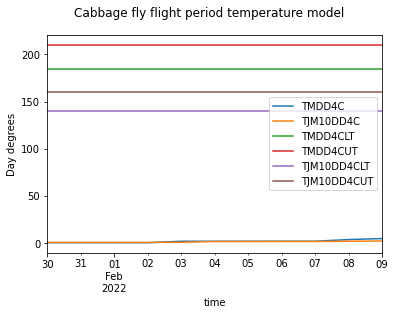

In [19]:
Del.plot(ds)

### PSILARTEMP Model

In [14]:
h = Hub()
psi=h.get(dss="no.nibio.vips", model="PSILARTEMP")

psi.informations(display="dataframe")


,name,id,description,type_of_decision,pests,crops,weather input,field_observation input,output,output_description
0,Carrot fly flight model,PSILARTEMP,THE PEST: The first generation of adult carrot...,Short-term tactical,[PSILRO],[DAUCS],1002,None,"TMDD5C, THRESHOLD_1, THRESHOLD_2, THRESHOLD_3","Accumulated day degrees, Threshold for start o..."


In [16]:
fmi=ws.get_ressource('fi.fmi.observation.station')

fmiweather=fmi.data(stationId=[101104],
                    parameters=[1002,3002],
                    display="json",
                    timeZone="Europe/Oslo",
                    varname="name")

INFO:start connecting to station 101104


In [17]:
ds=psi.run(weatherdata=fmiweather,view='ds')
ds

<xarray.Dataset>
Dimensions:      (time: 21)
Coordinates:
  * time         (time) datetime64[ns] 2020-06-12 2020-06-13 ... 2020-07-02
Data variables:
    TMDD5C       (time) float64 13.03 26.63 40.01 54.75 ... 281.3 290.0 298.2
    THRESHOLD_1  (time) float64 260.0 260.0 260.0 260.0 ... 260.0 260.0 260.0
    THRESHOLD_2  (time) float64 360.0 360.0 360.0 360.0 ... 360.0 360.0 360.0
    THRESHOLD_3  (time) float64 560.0 560.0 560.0 560.0 ... 560.0 560.0 560.0
Attributes:
    name:             Carrot fly flight model
    id:               PSILARTEMP
    version:          1.0
    authors:          {'name': '', 'email': 'vips@nibio.no', 'organization': ...
    description:      THE PEST: The first generation of adult carrot fly emer...
    description_url:  https://www.vips-landbruk.no/forecasts/models/PSILARTEMP/

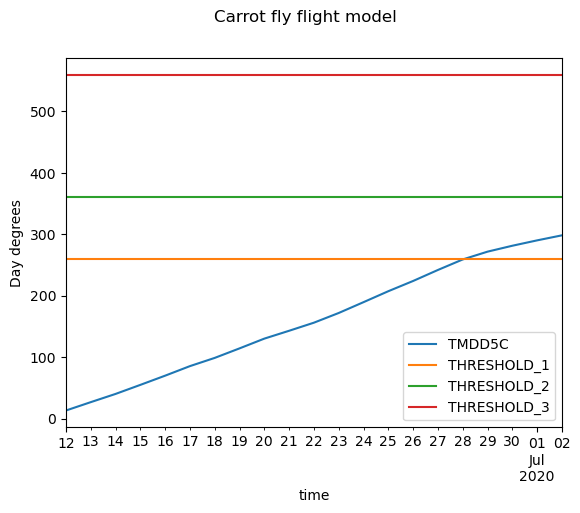

In [18]:
psi.plot(ds)


In [21]:
data = pandas.read_csv(datadir + "Boigneville_2012_2013_h.csv", names=['date', 'h', 'temperature_air',
                                        'relative_humidity', 'rain',
                                        'wind_speed', 'global_radiation'],
                sep=';', decimal=',', skiprows=2, encoding='latin-1')

data.index = pandas.to_datetime(data['date'].map(str) + ' ' + data['h'],
                            dayfirst=True)
data['global_radiation'] *= (10000. / 3600)
# convert wind km/h -> m.s-1
data['wind_speed'] *= (1000. / 3600)
data=data.drop(columns=["date","h","relative_humidity","rain","wind_speed","global_radiation"])
data

weather=ws.get_ressource(name=None)
weather=weather.dataframe_to_ipm(longitude=3.87,
                         latitude=43.61,
                         altitude=0,
                         timezone="Europe/Paris",
                         interval=3600,
                         convert_name={'temperature_air': 1002,"relative_humidity": 3001,"rain": 2001,"wind_speed": 4005,"global_radiation": 5001 },
                         display="json")
# import json
ds=psi.run(weatherdata=weather,view="ds")
psi.plot(ds)

NotImplementedError: the resource is unknown or the name of the resource is misspelled

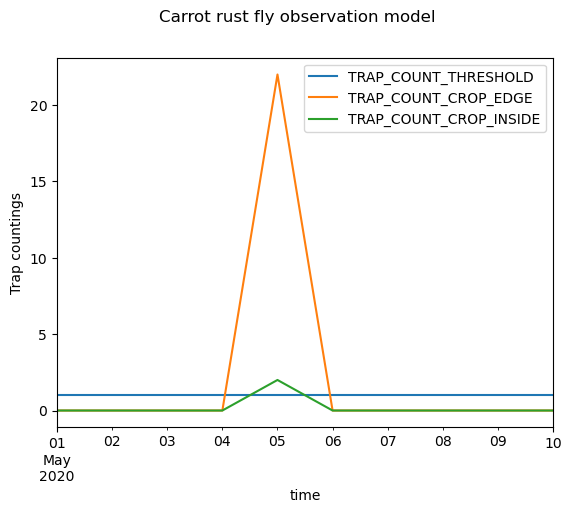

In [22]:
h=Hub()
psiobs=h.get(dss="no.nibio.vips",model="PSILAROBSE")
psiobs.informations(display="dataframe")

#  dataset with observation
fieldObservation=pandas.DataFrame(index= pandas.date_range(start="2020-05-01",end="2020-05-10",tz="UTC",freq="H"),columns=["trapCountCropEdge","trapCountCropInside"])
fieldObservation.loc["2020-05-05T12:00:00Z", "trapCountCropEdge"] = 22
fieldObservation.loc["2020-05-05T12:00:00Z", "trapCountCropInside"] = 2

#attributs of observation
fieldObservation.attrs={"location":{"type":"Points","coordinates":["11.025635","59.715791"]},
          "time":'2020-05-05T12:00:00Z',
          "pestEPPOCode":"SEPTA",
          "cropEPPOCode":"APUGD"}

ds=psiobs.run(fieldObservation=fieldObservation,view="ds")
psiobs.plot(ds)


### NAERSTADMO model

INFO:start connecting to station 46


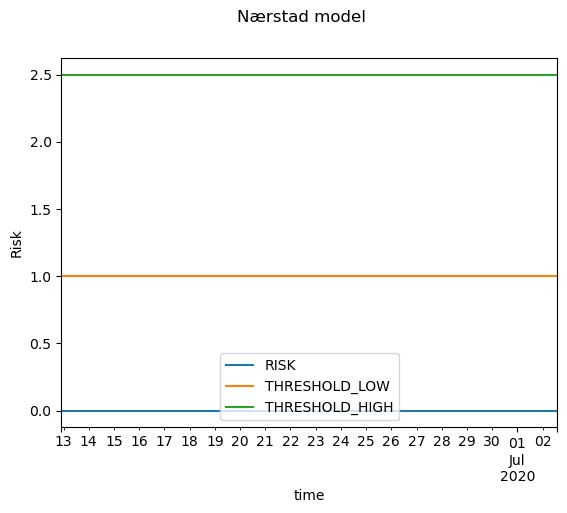

In [23]:
h=Hub()
ws=WeatherDataHub()
land=ws.get_ressource(name="no.nibio.lmt")
weather_land=land.data(stationId=[46],parameters=[2001, 5001, 1002, 3002, 3101],display="json")

NAERSTADMO=h.get(model="NAERSTADMO")

ds=NAERSTADMO.run(weatherdata=weather_land)
ds
NAERSTADMO.plot(ds)
